In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# CSV Befehl um csv als pandas einzulesen
df = pd.read_csv("project/survey_results_public.csv")
df.set_index("ResponseId", inplace=True)

#### Befehl um alle "SO"-Spalten zu droppen

Warum haben wir das gedroppt?
-> Nur Bezug auf Stackoverflow Sachen, ist nicht Relevant für uns.

In [3]:
df = df.drop(columns=df.columns[df.columns.str.startswith('SO')])
df[['Age', 'YearsCode', 'JobSat']]

,Age,YearsCode,JobSat
ResponseId,,,
1,25-34 years old,14.0,10.0
2,25-34 years old,10.0,9.0
3,35-44 years old,12.0,8.0
4,35-44 years old,5.0,6.0
5,35-44 years old,22.0,7.0
...,...,...,...
49119,25-34 years old,13.0,8.0
49120,35-44 years old,15.0,NaN
49121,25-34 years old,NaN,NaN


In [5]:
# Alle Werte in Strings umwandeln und NaN-Werte entfernen
languages = df['LanguageHaveWorkedWith'].dropna().astype(str)

# Einzigartige Werte erhalten
unique_languages = set()

# Durch alle Einträge iterieren
for lang_list in languages:
    # Aufteilen der Einträge, falls sie durch Semikolon getrennt sind
    for lang in lang_list.split(';'):
        unique_languages.add(lang.strip())

# Ausgabe der einzigartigen Werte
print("Einzigartige Sprachen in 'LanguageHaveWorkedWith':")
for lang in sorted(unique_languages):
    print(lang)

Einzigartige Sprachen in 'LanguageHaveWorkedWith':
Ada
Assembly
Bash/Shell (all shells)
C
C#
C++
COBOL
Dart
Delphi
Elixir
Erlang
F#
Fortran
GDScript
Gleam
Go
Groovy
HTML/CSS
Java
JavaScript
Kotlin
Lisp
Lua
MATLAB
MicroPython
Mojo
OCaml
PHP
Perl
PowerShell
Prolog
Python
R
Ruby
Rust
SQL
Scala
Swift
TypeScript
VBA
Visual Basic (.Net)
Zig


In [ ]:

language_categories = {
    'Web Development': {
        'JavaScript', 'TypeScript', 'HTML/CSS', 'PHP', 'Ruby', 'Dart', 'Elixir',
        'ClojureScript', 'CoffeeScript', 'Elm', 'Haml', 'Handlebars', 'Haskell', 'Haxe',
        'JSX', 'Jinja', 'Liquid', 'Markdown', 'Mustache', 'Nim', 'Pug', 'PureScript',
        'ReScript', 'Sass', 'SCSS', 'Solidity', 'Svelte', 'Twig', 'Vue.js', 'WebAssembly',
        'Swift',  # Moved from Mobile
        'Objective-C',  # Moved from Mobile
        'Kotlin', 'Gleam',  # Moved from Mobile
    },
    'Data Science & Analytics': {
        'Python', 'R', 'Julia', 'MATLAB', 'SAS', 'Stata', 'SPSS', 'Scala', 'Jupyter Notebooks',
        'SQL', 'PL/SQL', 'T-SQL', 'NoSQL', 'MongoDB', 'Cassandra', 'Hadoop', 'Pig', 'Hive',
        'Prolog', 'Rust', 'Fortran', 'MapReduce', 'Pig Latin'
    },
    'Systems & Embedded': {
        'C', 'C++', 'Go', 'Rust', 'Assembly', 'VHDL', 'Verilog', 'Ada', 'Erlang', 'Lua',
        'Perl', 'Shell', 'Bash', 'PowerShell', 'Batch', 'Rust',  'MicroPython', 'Zig'
    },
    'Enterprise & General Purpose': {
        'Java', 'C#', 'F#', 'Visual Basic', 'Delphi', 'Pascal', 'COBOL', 'Fortran', 'Lisp',
        'Prolog', 'Smalltalk', 'Groovy', 'Kotlin', 'Scala', 'Clojure', 'VBA', 'Visual Basic (.Net)'
    },
    'Bash/Shell (all shells)': {
        'Bash', 'Shell', 'PowerShell', 'Batch', 'Bash/Shell (all shells)'  
    }
}

# Note: Dart was already in Web Development, so it wasn't moved
# Java and C# were already in Enterprise & General Purpose, so they weren't moved
# Kotlin was moved to Web Development as it's commonly used for web backends with Ktor/Spring

# Create the mapping DataFrame
mapping_data = []
for category, languages in language_categories.items():
    for lang in languages:
        mapping_data.append({'Language': lang, 'Category': category})
mapping_df = pd.DataFrame(mapping_data)

# Create a temporary DataFrame with one row per language
temp_rows = []
for idx, row in df.iterrows():
    if pd.notna(row['LanguageHaveWorkedWith']):
        languages = [lang.strip() for lang in str(row['LanguageHaveWorkedWith']).split(';') if lang.strip()]
        for lang in languages:
            temp_rows.append({'index': idx, 'Language': lang})

# Create temporary DataFrame
temp_df = pd.DataFrame(temp_rows)

# Merge with mapping
merged_df = pd.merge(
    temp_df,
    mapping_df,
    on='Language',
    how='left'
).fillna({'Category': 'Other'})

# Group by original index and collect unique categories
result_series = merged_df.groupby('index')['Category'].unique()

# Convert to list of categories
df['Categories'] = df.index.map(lambda x: list(result_series.get(x, [])))

# Show the result
print("\nFinal result preview:")
print(df[['LanguageHaveWorkedWith', 'Categories']].head())

# Show distribution of categories
print("\nCategory distribution:")
print(df['Categories'].explode().value_counts())
df[['LanguageHaveWorkedWith', 'Categories']]




Final result preview:
                                       LanguageHaveWorkedWith  \
ResponseId                                                      
1                            Bash/Shell (all shells);Dart;SQL   
2                                                        Java   
3                         Dart;HTML/CSS;JavaScript;TypeScript   
4                                             Java;Kotlin;SQL   
5           C;C#;C++;Delphi;HTML/CSS;Java;JavaScript;Lua;P...   

                                                   Categories  
ResponseId                                                     
1           [Other, Web Development, Data Science & Analyt...  
2                              [Enterprise & General Purpose]  
3                                           [Web Development]  
4           [Enterprise & General Purpose, Web Development...  
5           [Systems & Embedded, Enterprise & General Purp...  

Category distribution:
Categories
Data Science & Analytics        26561


,LanguageHaveWorkedWith,Categories
ResponseId,,
1,Bash/Shell (all shells);Dart;SQL,"[Other, Web Development, Data Science & Analyt..."
2,Java,[Enterprise & General Purpose]
3,Dart;HTML/CSS;JavaScript;TypeScript,[Web Development]
4,Java;Kotlin;SQL,"[Enterprise & General Purpose, Web Development..."
5,C;C#;C++;Delphi;HTML/CSS;Java;JavaScript;Lua;P...,"[Systems & Embedded, Enterprise & General Purp..."
...,...,...
49119,NaN,[]
49120,NaN,[]
49121,NaN,[]


In [20]:
# Create the pivot table with dropna=True
pivot_avg = pd.pivot_table(
    data=df,
    values=['JobSat', 'WorkExp', 'ConvertedCompYearly'],
    index='Country',
    aggfunc='mean',
    dropna=True  # This will exclude any rows with NaN values in the specified columns
)

# Get count of non-null responses per country for each column
job_sat_counts = df[df['JobSat'].notna()].groupby('Country')['JobSat'].count()
work_exp_counts = df[df['WorkExp'].notna()].groupby('Country')['WorkExp'].count()
comp_counts = df[df['ConvertedCompYearly'].notna()].groupby('Country')['ConvertedCompYearly'].count()

# Create a DataFrame with all counts
counts_df = pd.DataFrame({
    'JobSat_Count': job_sat_counts,
    'WorkExp_Count': work_exp_counts,
    'ConvertedCompYearly_Count': comp_counts,
    'Total_Responses': df['Country'].value_counts()
})

# Merge the average values with the counts
pivot_result = pd.merge(
    pivot_avg,
    counts_df,
    left_index=True,
    right_index=True,
    how='left'
)

# Sort by total responses (descending)
pivot_result = pivot_result.sort_values('Total_Responses', ascending=False)

# Format the output
pivot_styled = pivot_result.style.format({
    'JobSat': '{:.2f}',
    'WorkExp': '{:.2f}',
    'ConvertedCompYearly': '{:,.0f}',
    'JobSat_Count': '{:,.0f}',
    'WorkExp_Count': '{:,.0f}',
    'ConvertedCompYearly_Count': '{:,.0f}',
    'Total_Responses': '{:,.0f}'
}).background_gradient(subset=['Total_Responses'], cmap='YlGn')

# Display the result
print("Durchschnittswerte und Antwortanzahlen nach Land:")
pivot_styled

Durchschnittswerte und Antwortanzahlen nach Land:


,ConvertedCompYearly,JobSat,WorkExp,JobSat_Count,WorkExp_Count,ConvertedCompYearly_Count,Total_Responses
Country,,,,,,,
United States of America,"179,815",7.29,17.21,"5,234","6,785","5,239","7,226"
Germany,"86,444",7.02,13.54,"2,208","2,825","2,141","3,022"
India,"44,393",7.12,7.72,"1,725","2,026","1,093","2,542"
United Kingdom of Great Britain and Northern Ireland,"112,969",7.06,17.43,"1,521","1,943","1,485","2,038"
France,"73,794",7.22,13.41,"1,065","1,308","1,026","1,409"
Canada,"100,143",7.34,16.27,960,"1,229",915,"1,303"
Ukraine,"105,101",7.30,8.32,744,929,709,964
Poland,"97,983",7.00,11.58,675,807,588,887
Netherlands,"115,293",7.36,14.81,651,825,619,867


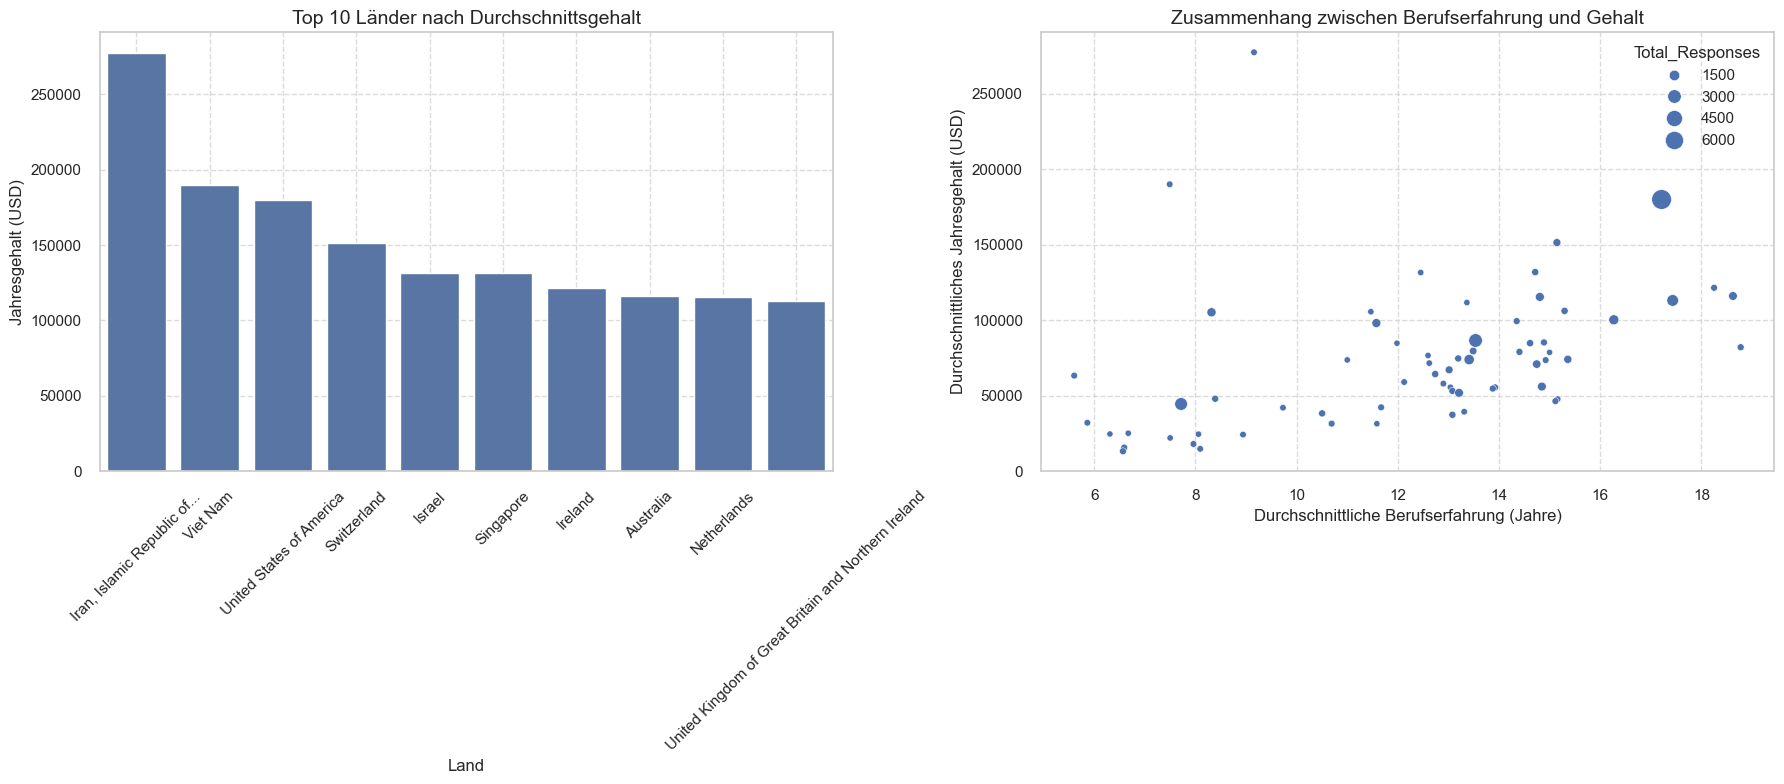

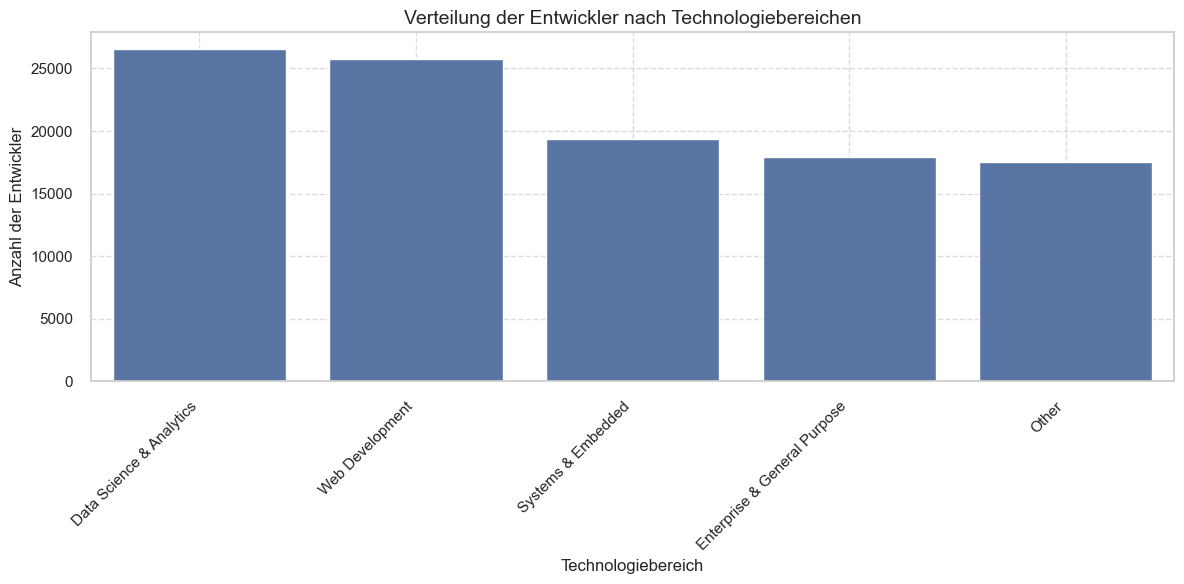

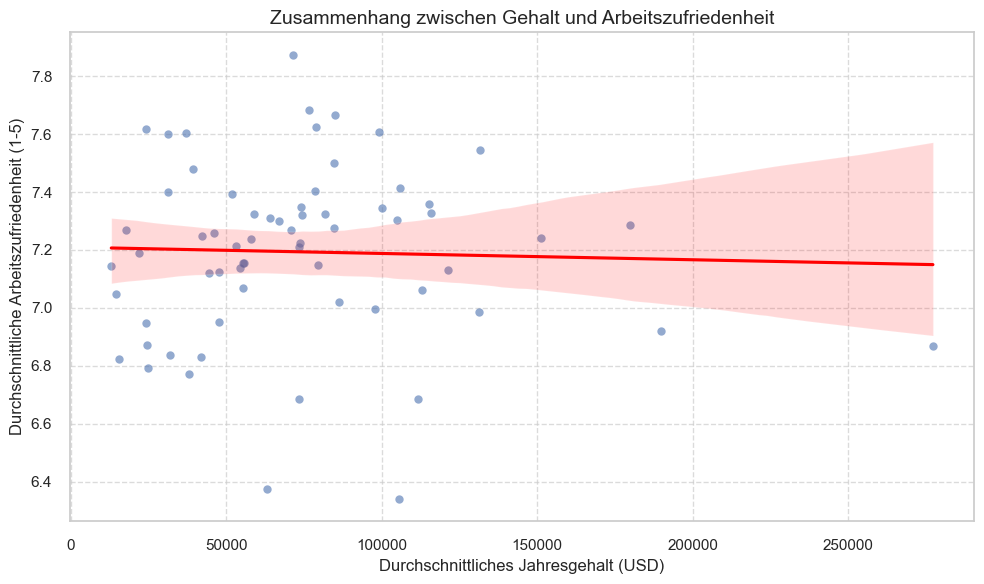

In [22]:
# Set style for plots
# Set style for plots - using 'seaborn-v0_8' which is the default style in newer versions
plt.style.use('seaborn-v0_8')
sns.set_theme(style="whitegrid")  # Using seaborn's theming


# 1. Analysis of Salary vs. Experience by Country
# Filter countries with sufficient data
min_responses = 50  # Minimum number of responses to be included
filtered_data = pivot_result[pivot_result['Total_Responses'] >= min_responses].sort_values('ConvertedCompYearly', ascending=False)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Plot 1: Top 10 Countries by Salary
top_countries = filtered_data.head(10)
sns.barplot(x=top_countries.index, y='ConvertedCompYearly', data=top_countries, ax=ax1)
ax1.set_title('Top 10 Länder nach Durchschnittsgehalt', fontsize=14)
ax1.set_ylabel('Jahresgehalt (USD)')
ax1.set_xlabel('Land')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, linestyle='--', alpha=0.7)

# Plot 2: Experience vs. Salary
sns.scatterplot(
    x='WorkExp', 
    y='ConvertedCompYearly', 
    size='Total_Responses',
    sizes=(20, 200),
    data=filtered_data,
    ax=ax2
)
ax2.set_title('Zusammenhang zwischen Berufserfahrung und Gehalt', fontsize=14)
ax2.set_xlabel('Durchschnittliche Berufserfahrung (Jahre)')
ax2.set_ylabel('Durchschnittliches Jahresgehalt (USD)')
ax2.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# 2. Analysis of Language Categories
# Count the number of developers in each category
category_counts = df['Categories'].explode().value_counts()

# Plot language category distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Verteilung der Entwickler nach Technologiebereichen', fontsize=14)
plt.xlabel('Technologiebereich')
plt.ylabel('Anzahl der Entwickler')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 3. Correlation between Job Satisfaction and Salary
plt.figure(figsize=(10, 6))
sns.regplot(
    x='ConvertedCompYearly', 
    y='JobSat', 
    data=pivot_result[pivot_result['Total_Responses'] >= min_responses],
    scatter_kws={'alpha':0.6},
    line_kws={'color': 'red'}
)
plt.title('Zusammenhang zwischen Gehalt und Arbeitszufriedenheit', fontsize=14)
plt.xlabel('Durchschnittliches Jahresgehalt (USD)')
plt.ylabel('Durchschnittliche Arbeitszufriedenheit (1-5)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [23]:
# Get all unique languages from the dataset
all_languages = set()
df['LanguageHaveWorkedWith'].dropna().str.split(';').apply(
    lambda x: [all_languages.add(lang.strip()) for lang in x] if isinstance(x, list) else None
)

# Find languages not in any category
categorized_languages = set()
for category in language_categories.values():
    categorized_languages.update(category)

uncategorized_languages = sorted(list(all_languages - categorized_languages))

print("Languages categorized as 'Other':")
for lang in uncategorized_languages:
    print(f"- {lang}")

print(f"\nTotal number of uncategorized languages: {len(uncategorized_languages)}")

Languages categorized as 'Other':
- Bash/Shell (all shells)
- GDScript
- Gleam
- MicroPython
- Mojo
- OCaml
- VBA
- Visual Basic (.Net)
- Zig

Total number of uncategorized languages: 9
